# Flight Price Prediction Project (Flip Robo Technologies)

In [1]:
# Let's import some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the datasets

data = pd.read_excel("Flight_Data.xlsx")

In [3]:
# Let's check the dataset

data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
# We are going to delete the columns Arrial_Time and Dep_Time because we have Duration Column

data.drop(columns = ["Arrival_Time","Dep_Time"], axis=1, inplace=True)

In [5]:
# Shape of both datasets

print("Shape of Train Dataset : ",data.shape)

Shape of Train Dataset :  (1500, 9)


In [6]:
# Quick information about datasets

print("\nInformation about Dataset\n================================\n")
data.info()


Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1500 non-null   object
 1   Date_of_Journey  1500 non-null   object
 2   Source           1500 non-null   object
 3   Destination      1500 non-null   object
 4   Route            1500 non-null   object
 5   Duration         1500 non-null   object
 6   Total_Stops      1500 non-null   object
 7   Additional_Info  1500 non-null   object
 8   Price            1500 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 105.6+ KB


All columns are in object form so that skewness issue is not exists.....

In [7]:
# Null value of Train Dataset

print("\nNull Values of Dataset\n============================")
data.isnull().sum()


Null Values of Dataset


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Not a single column has null value, looks good.

In [8]:
# Let's check the value counts of each object column for the dataset

for col in data.columns:
    if data[col].dtype=='object':
        print(data[col].value_counts())
        print()

Jet Airways                          525
IndiGo                               293
Air India                            244
Multiple carriers                    175
SpiceJet                             105
Vistara                               82
Air Asia                              46
GoAir                                 27
Vistara Premium economy                1
Jet Airways Business                   1
Multiple carriers Premium economy      1
Name: Airline, dtype: int64

18/05/2019    82
21/05/2019    78
6/06/2019     68
9/05/2019     63
21/03/2019    62
9/06/2019     62
12/06/2019    59
1/06/2019     57
27/05/2019    55
15/05/2019    52
15/06/2019    46
6/03/2019     46
6/05/2019     45
24/06/2019    44
27/06/2019    43
24/03/2019    43
3/06/2019     42
27/03/2019    42
12/05/2019    38
24/05/2019    38
3/03/2019     36
1/05/2019     34
9/03/2019     26
18/03/2019    24
1/04/2019     24
01/03/2019    23
15/03/2019    22
3/04/2019     21
9/04/2019     20
12/03/2019    18
24/04/2019

Jet Airways and Jet Airways Business are same

Multiple carriers Premium economy and Multiple carriers are same

Vistara Premium economy and Vistara are same


Let's replace them...

In [9]:
# Let's solve the above problem

data["Airline"].replace("Jet Airways Business", "Jet Airways", inplace=True)
data["Airline"].replace("Multiple carriers Premium economy", "Multiple carriers", inplace=True)
data["Airline"].replace("Vistara Premium economy", "Vistara", inplace=True)

In [10]:
# Let's check the Airlies data in Dataset

data["Airline"].value_counts()

Jet Airways          526
IndiGo               293
Air India            244
Multiple carriers    176
SpiceJet             105
Vistara               83
Air Asia              46
GoAir                 27
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

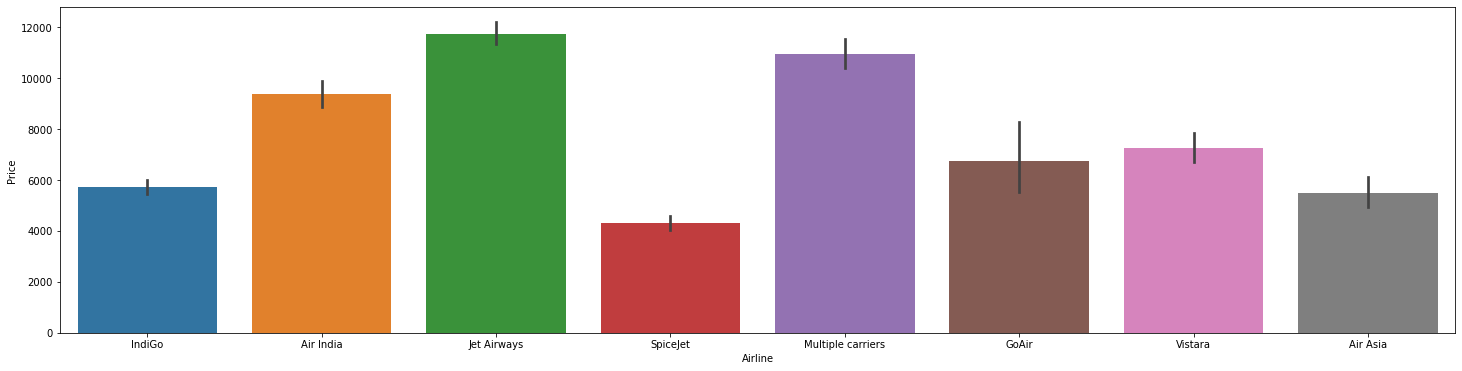

In [11]:
# Let's check the Airline Business

plt.figure(figsize=(25,6))
sns.barplot(x="Airline", y="Price", data=data)

<AxesSubplot:xlabel='Source', ylabel='count'>

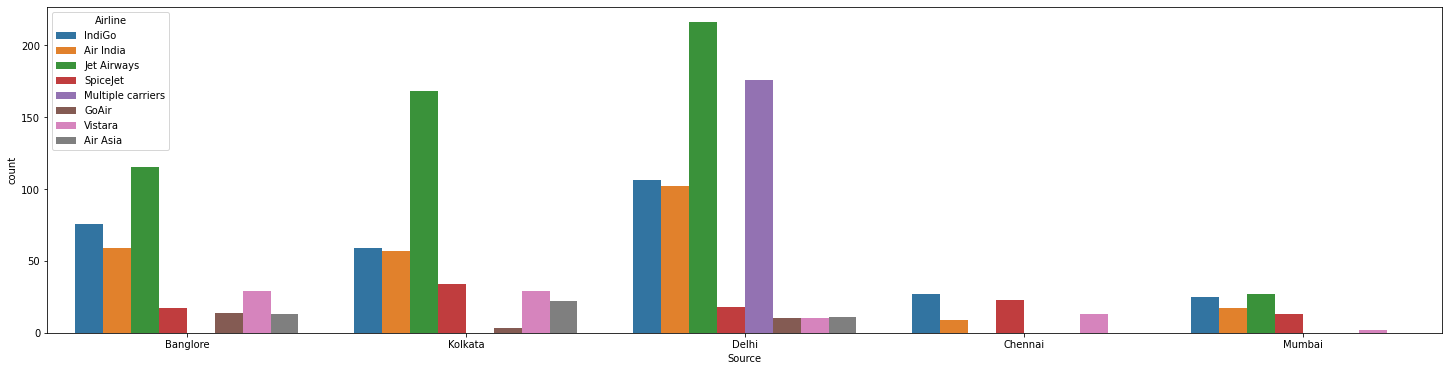

In [12]:
# Let's check the most popular flight region wise

plt.figure(figsize=(25,6))
sns.countplot(x="Source", data=data, hue="Airline")

In [13]:
# Let's use the one hot encoding technique on Train Dataset and transfer the object columns to numerical 

print("Shape before converting the object column to numerical : ",data.shape)
data = pd.get_dummies(data, drop_first=True)
print("Shape after converting the object column to numerical  : ",data.shape)

Shape before converting the object column to numerical :  (1500, 9)
Shape after converting the object column to numerical  :  (1500, 426)


In [15]:
# Let's separate input and target column from the train dataset

x = data.drop(columns = ["Price"], axis=1)
y = data["Price"]

Number of components explained 95% variance :  180


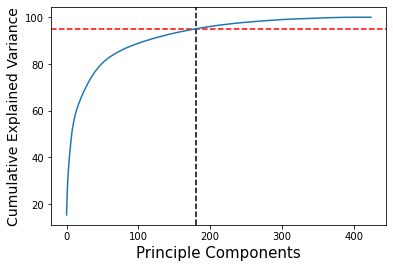

In [16]:
# Let' use th PCA technique

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_pca = PCA()
x_pca.fit(x)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)

print("Number of components explained 95% variance : ",k)
plt.xlabel("Principle Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=95, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

Out of 426, 180 features is giving the 95% variance. So, let's use the PCA Scaling for model building...

In [17]:
# Let's use the PCA Scaling

pca = PCA(n_components=180)
df_x = pca.fit_transform(x)

In [18]:
# Let's import the necessary libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from time import time

In [19]:
# Let's find the best random state

def randomstate(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(1,6):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.22, random_state=i)
        mod.fit(x_train, y_train)
        y_pre = mod.predict(x_test)
        score = r2_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State is      : ",max_state)
    print("Beset R2_Score is         : ",max_score)
    print("Cross Validation score is : ",cross_val_score(mod, df_x, y, cv=5, scoring='r2').mean())
    end = time()
    print("Time taken by model for prediction : {:.4f} seconds".format(end-start))

In [20]:
# Linear Regression

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
randomstate(LR)

Best Random State is      :  1
Beset R2_Score is         :  0.6822526183705693
Cross Validation score is :  0.6899778397458249
Time taken by model for prediction : 0.2997 seconds


In [21]:
# Format for all models

def bestmodel(model):
    start = time()
    x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.22, random_state=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    print("Best R2_Score is : ",score)
    print("Cross Validation Score is : ",cross_val_score(model, df_x, y, cv=5, scoring='r2').mean())
    end = time()
    print("Time taken by model for prediction : {:.4f} seconds".format(end-start))

In [22]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
bestmodel(DTR)

Best R2_Score is :  0.5355982414438598
Cross Validation Score is :  0.4164136067841958
Time taken by model for prediction : 1.9047 seconds


In [23]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
bestmodel(KNR)

Best R2_Score is :  0.6103675480980137
Cross Validation Score is :  0.7040843091365422
Time taken by model for prediction : 0.1636 seconds


In [24]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
bestmodel(RFR)

Best R2_Score is :  0.6515718462297758
Cross Validation Score is :  0.728563314513659
Time taken by model for prediction : 112.7754 seconds


In [26]:
# Saving the Final Model

import joblib

joblib.dump(LR, "Final_Predicted_Price_Model.pkl")

['Final_Predicted_Price_Model.pkl']